# Batch Normalization
---
- 신경망에는 과적합과 Gradient Vanishing 외에도 Internal Covariance Shift라는 현상이 발생함. 
- Internal Covariance Shift : 각 Layer마다 Input 분포가 달라짐에 따라 학습 속도가 느려지는 현상을 말함. 
- Batch Normalization은 이를 방지하기 위한 기법으로, 말 그대로 Layer의 Input 분포를 정규화해 학습 속도를 빠르게 하는 것임.

## 정규화 (Normalization)
---
- 기본적으로 정규화를 하는 이유는 학습을 더 빨리 하기 위해서 or Local Optimum 문제에 빠지는 가능성을 줄이기 위해서 사용함. 
- 아래 그림에서 최저점을 찾을 때 그래프를 전체적으로 이해하지 못해서 global optimum 지점을 찾지 못하고, local optimum에 머무르는 문제가 발생함. 
- 이러한 문제점은 정규화해 그래프를 왼쪽에서 오른쪽으로 만들어, local optimum에 빠질 수 있는 가능성을 낮춰주게 된다.  
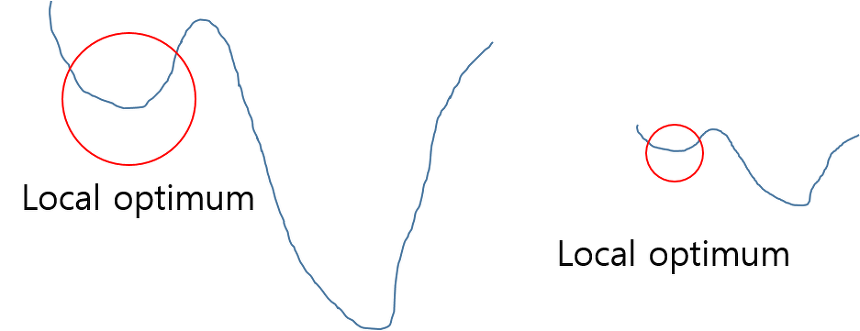

## Internal Covariance Shift
---
- 배치 정규화 논문에서는 학습에서 불안정화가 일어나는 이유를 'Internal Covariance Shift'라고 주장하고 있는데, 이는 네트워크의 각 레이어나 Activation마다 입력값의 분산이 달라지는 현상을 뜻함.  


> Covariate Shift : 이전 레이어의 파라미터 변화로 인해 현재 레이어의 입력의 분포가 바뀌는 현상  
Internal Covariate Shift : 레이어를 통과할 때마다 Covariate Shift가 일어나면서 입력의 분포가 약간씩 변하는 현상  

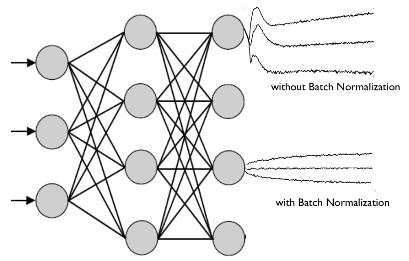  

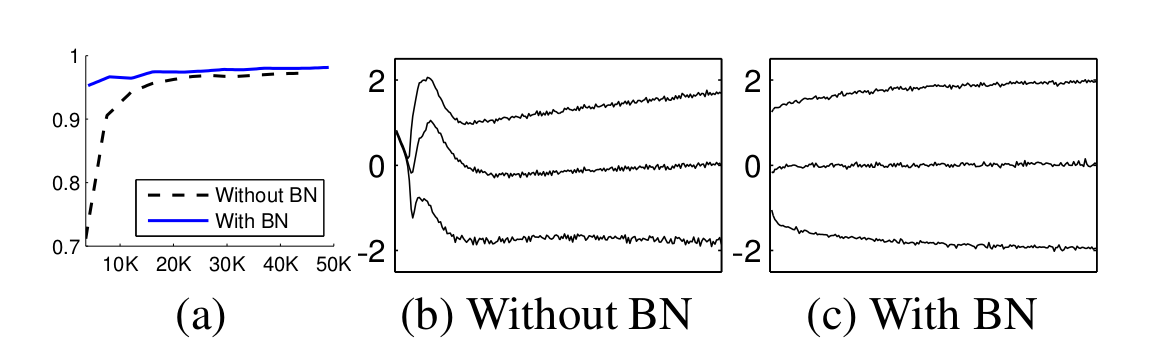

## Whitening의 문제점
---
- 이 현상을 막기 위해 간단하게 각 레이어의 입력의 분산을 평균 0, 표준편차 1인 입력값으로 정규화시키는 방법을 생각해 볼 수 있음. 이는 **Whitening**이라고 일컫는데, 백색 잡음으로 생각하면 됨. Whitening은 기본적으로 들어오는 입력값의 특징들을 uncorrelated하게 만들어주고, 각각의 분산을 1로 만들어주는 작업임. 
- 이는 covariance matrix의 계산과 inverse의 계산이 필요하기 때문에 계산량이 많을 뿐더러, Whitening은 일부 파라미터들의 영향이 무시됨. 
- 이렇듯 단순하게 Whitening만을 시킨다면 이 과정과 파라미터를 계산하기 위한 최적화(Back Propagation)과 무관하게 진행도기 때문에 특정 파라미터가 계속 커지는 형태로 Whitening이 진행 될 수 있음. Whitening을 통해 Loss가 변하지 않게 되면, 최적화 과정을 거치면서 특정 변수가 계속 커지는 현상이 발생할 수 있다고 함. 

## Batch Normalization
---
- Whitening의 문제점을 해결하도록 한 트릭이 배치 정규화임. 
- 배치 정규화는 평균과 분산을 조정하는 과정이 별도의 과정으로 떼어진 것이 아니라, 신경망 안에 포함되어 학습 시 평균과 분산을 조정하는 과정 역시 같이 조절된다는 점이 단순 Whitening과는 구별됨. 
- 즉, 각 레이어마다 정규화하는 레이어를 두어, 변형된 분포가 나오지 않도록 조절하는 것이 배치 정규화임.  

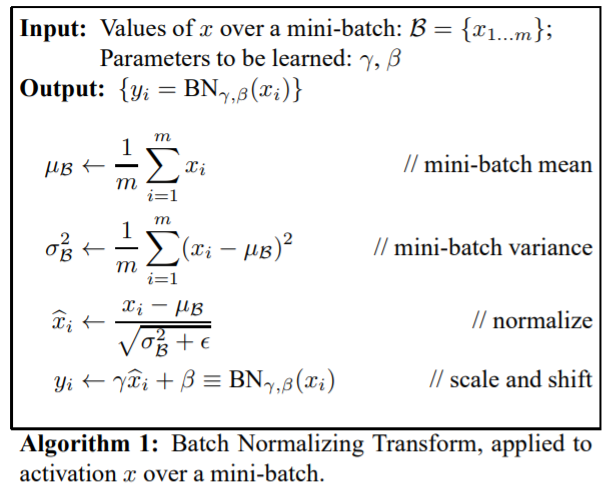

- 배치 정규화는 간단히 말하자면 미니배치의 평균과 분산을 이용해 정규화한 뒤에, scale 및 shift를 감마 값, 베타 값을 통해 실행함. 
- 이 때 감마와 베타 값은 학습 가능한 변수임 -> Backpropagation을 통해서 학습됨. 
- **배치 정규화는 학습 시 배치 단위의 평균과 분산들을 차례대로 받아 이동 평균과 이동 분산을 저장했다가, 테스트할 때는 해당 배치의 평균과 분산을 구하지 않고 구해놓았던 평균과 분산으로 정규화함.**
    - 배치 정규화를 사용하면 시그모이드나 tanh 함수를 사용해도 기울기 소실 문제가 크개 개선됨.
    - 가중치 초기화에 덜 민감해짐.
    - 더 큰 LR을 사용할 수 있어 학습 속도 개선
    - 미니 배치마다 평균과 표준편차를 계산 → 훈련 데이터에 일종의 잡음을 넣는 부수 효과로 과적합 방지
        - 부수적이기 때문에 Dropout과 함께 사용하는 것이 좋음.
    - 배치 정규화는 모델 복잡도를 높이고 추가 계산을 하기에, 테스트 데이터에 대한 에측 시 실행 시간이 느려짐 → 서비스 속도를 고려하는 관점에서는 배치 정규화가 꼭 필요한지 고민이 필요함.

## 배치 정규화의 한계
---

배치 정규화는 뛰어난 방법이지만 몇 가지 한계가 존재한다고 함. 

1. **미니 배치 크기에 의존적**
    
    
- 배치 정규화는 너무 작은 배치 크기에서는 잘 동작하지 않을 수 있음.
    - 단적으로 배치 크기를 1로 하면 → 분산은 0이 됨.
    - 작은 미니 배치에서는 배치 정규화의 효과가 극단적으로 작용해 훈련에 악영향을 줄 수 있음.
    - 작은 미니 배치보다는 크기가 어느 정도 되는 미니 배치에서 하는 것이 좋음.
        - 크기가 어느 정도 된다는 것은 정량적으로 판단할 수 있을까? 궁금해짐.

2. **RNN에 적용하기 어려움**
    
    
- RNN은 각 시점(time step)마다 다른 통계치를 가짐
    - 이는 RNN에 배치 정규화를 적용하는 것을 어렵게 만듦.

배치 크기에도 의존적이지 않고, RNN에 적용하는 것이 수월한 층 정규화(layer normalization)라는 것이 있음 → 공부할 게 많음…

## MNIST를 이용해 MLP 설계 시 Dropout + ReLU + Batch Normalization 적용하기
---
- 배치 정규화는 1-D, 2-D, 3-D 등 다양한 차원에 따라 적용되는 함수명이 다르기 때문에 유의해서 사용해야 함. 
- MLP 내 각 Layer에서 데이터는 1-D 크기의 벡터 값을 계산하기 때문에 nn.BatchNorm1d()를 이용함. 
- nn.BatchNorm() 함수를 이용해 적용하는 부분은 논문이나 코드에 따라 Activation Function 이전에 적용하는지, 이후에 적용하는지 다르게 이용됨. 이 예제에서는 Activation 함수 이전에 적용하는 방식으로 실습함. 

In [1]:
'''1. Module Import'''

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
'''2. 딥러닝 모델을 설계할 때 활용하는 장비 확인'''

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
    
print('Using Pytorch version: ', torch.__version__, 'Device: ', DEVICE)

Using Pytorch version:  1.11.0 Device:  cuda


In [3]:
BATCH_SIZE = 32
EPOCHS = 10

In [4]:
'''3. MNIST 데이터 다운로드 (split train / test)'''

train_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = True,
                              download = True,
                              transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "../data/MNIST",
                             train = False,
                             transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                         batch_size = BATCH_SIZE,
                                         shuffle = True)

In [5]:
'''4. 데이터 확인하기'''

for (X_train, y_train) in train_loader:
    
    print('X_train: ', X_train.size(), 'type: ', X_train.type())
    print('y_train: ', y_train.size(), 'type: ', y_train.type())
    
    break

X_train:  torch.Size([32, 1, 28, 28]) type:  torch.FloatTensor
y_train:  torch.Size([32]) type:  torch.LongTensor


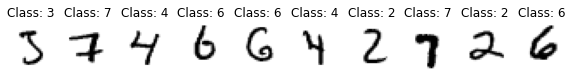

In [6]:
'''5. 데이터 확인하기'''
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap='gray_r')
    plt.title('Class: ' + str(y_train[i].item()))

In [7]:
'''6. MLP(Multi Layer Perceptron) 모델 설계하기'''

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.batch_norm2 = nn.BatchNorm1d(256)
        
    def forward(self, x):
        
        x = x.view(-1, 28*28)
        
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p=self.dropout_prob)
        
        x = self.fc2(x)
        x = self.batch_norm2(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p=self.dropout_prob)
        
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        
        return x

In [8]:
'''7. Optimizer, Objective Function 설정하기'''

model = Net().to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [9]:
'''8. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의'''

def train(model, train_loader, optimizer, log_interval):
    
    model.train()
    
    for batch_idx, (image, label) in enumerate(train_loader):
        
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        
        # 과거에 이용한 Mini-Batch 내에 있는 이미지와 레이블을 바탕으로 계산된 Loss의 Gradient 값이
        # optimizer에 할당되어 있으므로 optimizer의 Gradient를 초기화
        optimizer.zero_grad()
        
        # 장비에 할당한 이미지 데이터를 MLP 모델의 Input으로 이용해 Output 계산
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        
        # 각 파라미터에 할당된 Gradient 값을 이용해 파라미터 값을 업데이트
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
            Epoch, batch_idx * len(image),
            len(train_loader.dataset), 100. * batch_idx / len(train_loader),
            loss.item()))

In [10]:
'''9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의'''

def evaluate(model, test_loader):
    
    # 학습 과정 또는 학습이 완료된 MLP 모델을 학습 상태가 아닌, 평가 상태로 지정
    model.eval()
    
    # 기존에 정의한 test_loader 내의 데이터를 이용해 Loss 값을 계산하기 위해 test_loss를 0으로 임시 설정
    test_loss = 0
    
    # 학습 과정 또는 학습이 완료된 MLP 모델이 올바른 Class로 분류한 경우를 세기 위해 correct = 0으로 임시 설정
    correct = 0
    
    with torch.no_grad():
        for image, label in test_loader:
            
            image = image.to(DEVICE)
            label = label.to(DEVICE)
    
            output = model(image)
            test_loss += criterion(output, label).item()
            
            prediction = output.max(1, keepdim=True)[1]
            
            # MLP 모델이 최종으로 예측한 클래스 값과 실제 레이블이 의미하는 클래스가 맞으면 correct에 더해 올바르게 예측한 횟수를 저장
            correct += prediction.eq(label.view_as(prediction)).sum().item()
            
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    
    return test_loss, test_accuracy

In [11]:
'''10. MLP 학습을 실행하면서 Train, Test set의 Loss 및 Test set Accuracy를 확인하기'''

for Epoch in range(1, EPOCHS + 1):
    
    train(model, train_loader, optimizer, log_interval=200)
    
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".
         format(Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.536709
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 0.539976
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 0.403609
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 0.296565
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 0.360328
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 0.355500
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 0.244091
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 0.329432
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 0.204029
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 0.665766

[EPOCH: 1], 	Test Loss: 0.0049, 	Test Accuracy: 95.23 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.149845
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 0.438966
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 0.064267
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 0.150141
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 0.220968
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 0.576384
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 0.165637
Train Epoch: 2 [448

- 배치 정규화를 적용했을 때 Test Loss는 감소하며, Test Accuracy 값이 높아짐. 
- 이를 통해 MLP 모델의 성능이 향상됐다고 판단할 수 있음. 

## Reference
---
- 파이썬 딥러닝 파이토치 - 이경택, 방성수, 안상준  
- https://wikidocs.net/61271
- https://eehoeskrap.tistory.com/430